In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk

In [2]:
data = pd.read_csv( r"C:\Users\dhvani\Downloads\Movie Review Sentiment Analysis-Dhvani\Movie_Review.csv")

In [3]:
data.head()

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos


In [4]:
data.shape

(1000, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


Clean the data

In [6]:
data['sentiment'] = data['sentiment'].astype(str).str.strip().str.lower()

In [ ]:
# Map labels to numbers
data['sentiment'] = data['sentiment'].map({'neg': 0, 'pos': 1})

In [ ]:
# Remove invalid rows
data = data.dropna(subset=['sentiment'])

In [9]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [10]:
data['text'] = data['text'].astype(str)
data['text'].isnull().sum()

0

In [11]:
X = data['text']
y = data['sentiment']

In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2500)
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.835

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       101
           1       0.83      0.84      0.83        99

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200



In [17]:
pk.dump(model, open('model.pk', 'wb'))
pk.dump(tfidf, open('tfidf.pk', 'wb'))

In [ ]:
# Test Prediction
sample_review = ["This movie was amazing and very entertaining"]

sample_vector = tfidf.transform(sample_review)
model.predict(sample_vector)

array([1], dtype=int64)

In [ ]:
# Wordcloud
from wordcloud import WordCloud, STOPWORDS

Negative Reviews WordCloud

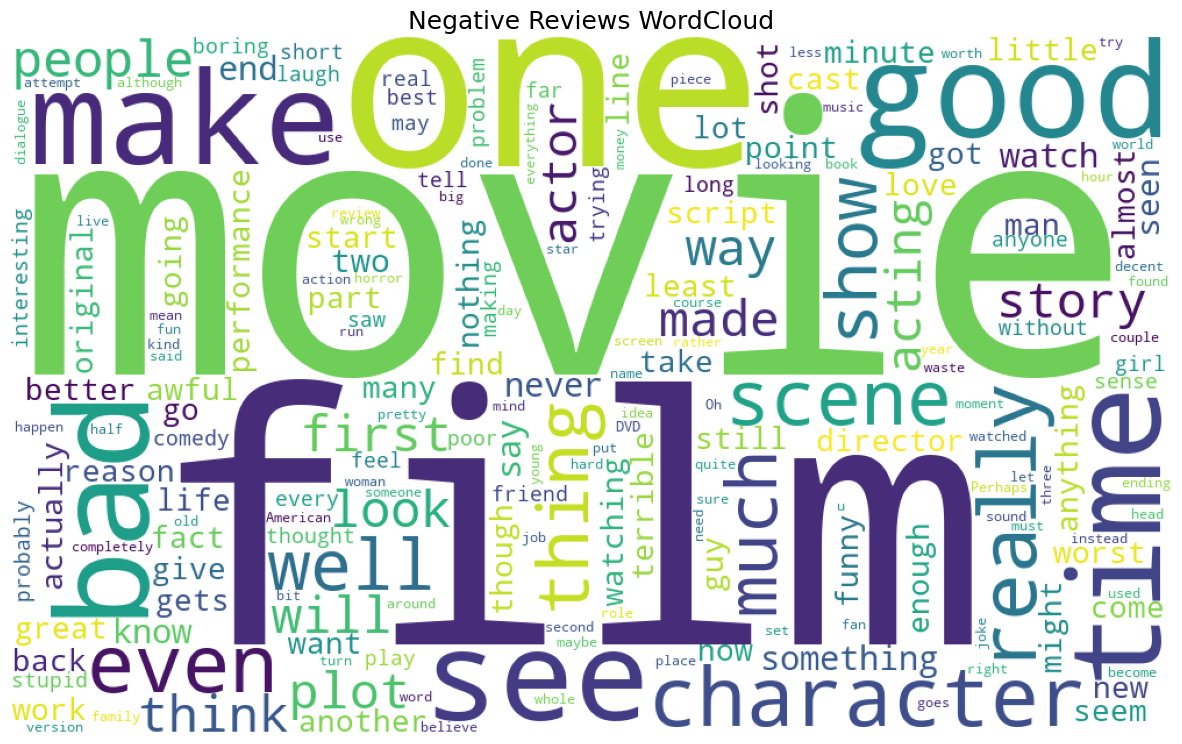

In [20]:
neg_text = " ".join(data.loc[data['sentiment'] == 0, 'text'])

neg_wc = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    stopwords=STOPWORDS
)

plt.figure(figsize=(15, 10))
plt.imshow(neg_wc.generate(neg_text).to_image())
plt.axis('off')
plt.title("Negative Reviews WordCloud", fontsize=18)
plt.show()

Positive Reviews WordCloud

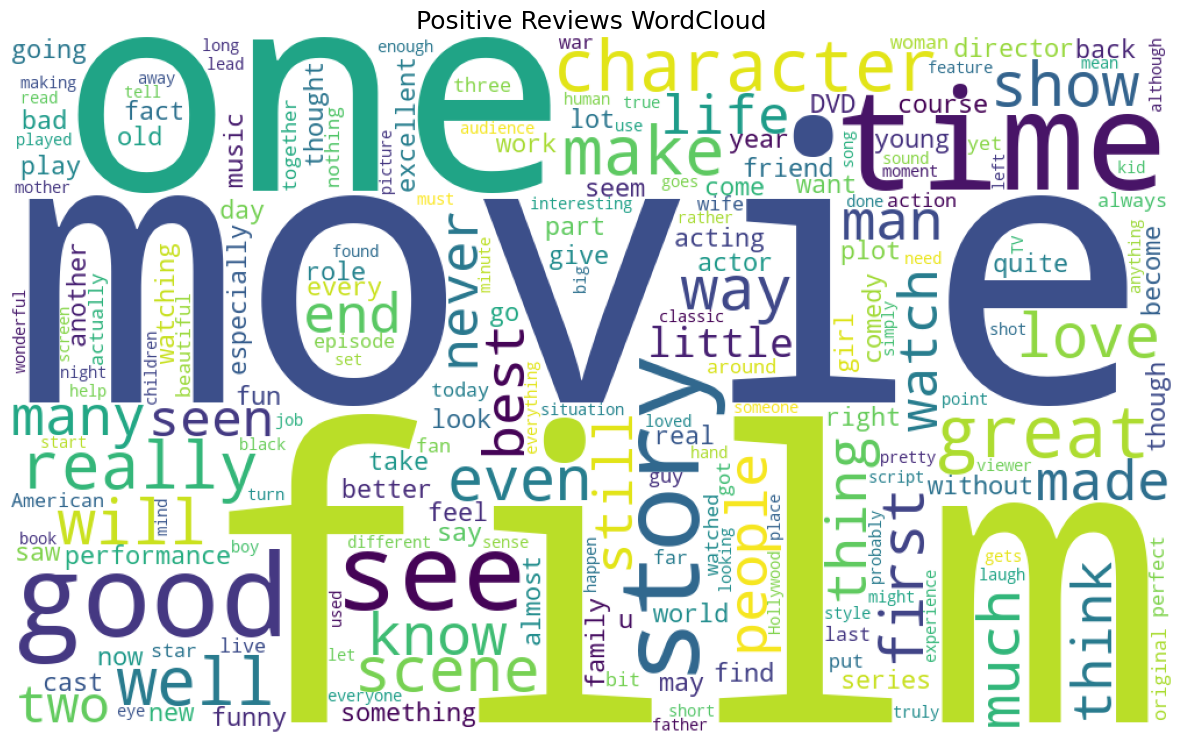

In [21]:
pos_text = " ".join(data.loc[data['sentiment'] == 1, 'text'])

pos_wc = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    stopwords=STOPWORDS
)

plt.figure(figsize=(15, 10))
plt.imshow(pos_wc.generate(pos_text).to_image())
plt.axis('off')
plt.title("Positive Reviews WordCloud", fontsize=18)
plt.show()

In [22]:
neg_wc.to_file("negative_wordcloud.png")
pos_wc.to_file("positive_wordcloud.png")

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [24]:
y_pred = model.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, y_pred)

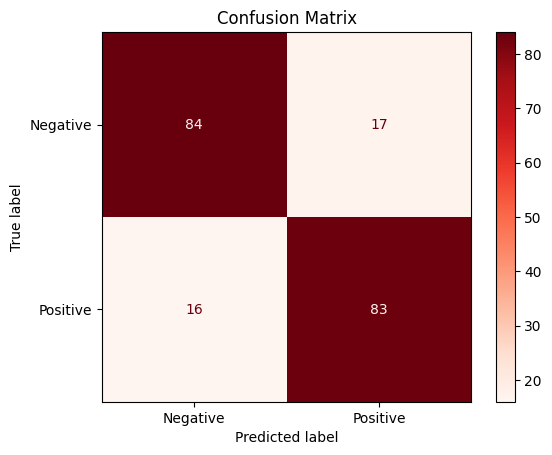

In [28]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Negative', 'Positive']
)

disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()